In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
national_names = pd.read_csv('Datasets/NationalNames.csv', delimiter = ',', usecols = [1, 2, 3, 4])
state_names = pd.read_csv('Datasets/StateNames.csv', delimiter = ',', usecols = [1, 2, 3, 4, 5])

### Question 4: Of the names represented in the data, find the name that has had the largest percentage increase in popularity since 1980. Largest decrease?

In [3]:
# look at data for 1980 and 2014
data_1980 = national_names[national_names['Year'] == 1980]
data_2014 = national_names[national_names['Year'] == 2014]

In [4]:
# build dictionary of names from 1980, values are counts
names_1980_dict = {}
names = data_1980.iloc[:,0].values
counts = data_1980.iloc[:,-1].values
for i in range(len(data_1980.index)):
    if names[i] not in names_1980_dict:
        names_1980_dict[names[i]] = counts[i]
    # or increase count
    else:
        names_1980_dict[names[i]] += counts[i]

In [5]:
# build dictionary of names from 2014, values are counts
names_2014_dict = {}
names = data_2014.iloc[:,0].values
counts = data_2014.iloc[:,-1].values
for i in range(len(data_2014.index)):
    if names[i] not in names_2014_dict:
        names_2014_dict[names[i]] = counts[i]
    # or increase count
    else:
        names_2014_dict[names[i]] += counts[i]

In [6]:
# build dictionary of names from both 1980 and 2014, values are percentage changes from 1980-2014
names_shared_dict = {}
names = names_2014_dict.keys()
counts = names_2014_dict.values()

for i in range(len(names_2014_dict)):
    if names[i] in names_1980_dict:
        names_shared_dict[names[i]] = 100*round(float(counts[i] - names_1980_dict[names[i]])/
                                                names_1980_dict[names[i]], 4)

# do some processing on dictionary to get largest percentage increase and decrease
names_list = names_shared_dict.items()

# sort that list
names_list = sorted(names_list, key=lambda x: x[1])

print "Name with largest percentage increase in popularity is", names_list[-1][0], \
      "(", "{:,}".format(names_list[-1][1]), "%)"
print "Name with largest percentage decrease in popularity is", names_list[0][0], \
      "(", "{:,}".format(names_list[0][1]), "%)"

Name with largest percentage increase in popularity is Jase ( 74,580.0 %)
Name with largest percentage decrease in popularity is Tamika ( -99.61 %)


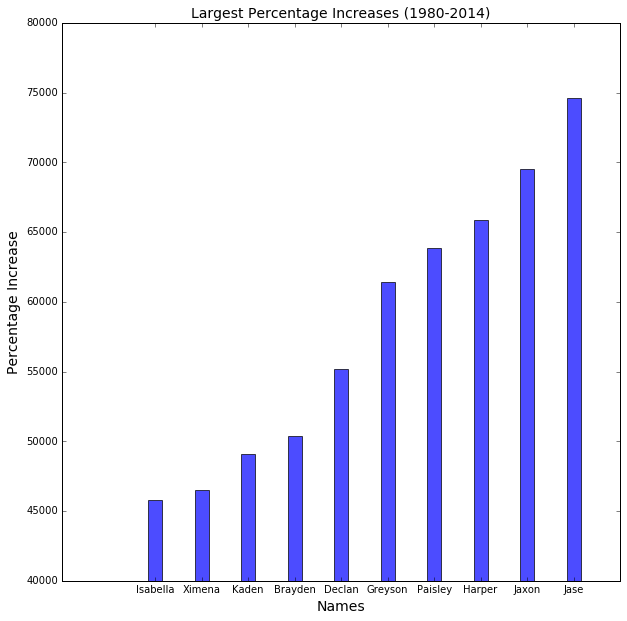

In [39]:
inc_names = []
inc_percents = []

for i in reversed(range(1, 11)):
    inc_names.append(names_list[-i][0])
    inc_percents.append(names_list[-i][1])

dec_names = []
dec_percents = []

for i in reversed(range(10)):
    dec_names.append(names_list[i][0])
    dec_percents.append(names_list[i][1])

fig = plt.figure(figsize=(10, 10))

ax1 = fig.add_subplot(111)

n_groups = 10

index = np.arange(n_groups)
bar_width = 0.30

opacity = 0.7

ax1.bar(index, inc_percents, bar_width, alpha = opacity, align="center")
plt.xticks(labels, inc_names)
ax1.set_ylim(40000, 80000)
ax1.set_title('Largest Percentage Increases (1980-2014)', size = '14')
ax1.set_xlabel('Names', size = '14')
ax1.set_ylabel('Percentage Increase', size = '14')

plt.savefig('1980_percents_1.png')

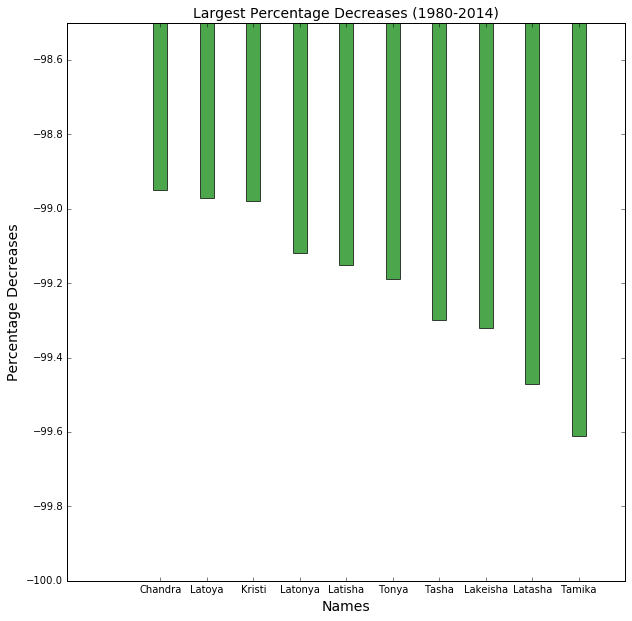

In [41]:
fig = plt.figure(figsize=(10, 10))

ax2 = fig.add_subplot(111)

ax2.bar(index, dec_percents, bar_width, alpha = opacity, color = 'g', align="center")
plt.xticks(labels, dec_names)
ax2.set_ylim(-100, -98.5)
ax2.set_title('Largest Percentage Decreases (1980-2014)', size = '14')
ax2.set_xlabel('Names', size = '14')
ax2.set_ylabel('Percentage Decreases', size = '14')

plt.savefig('1980_percents_2.png')

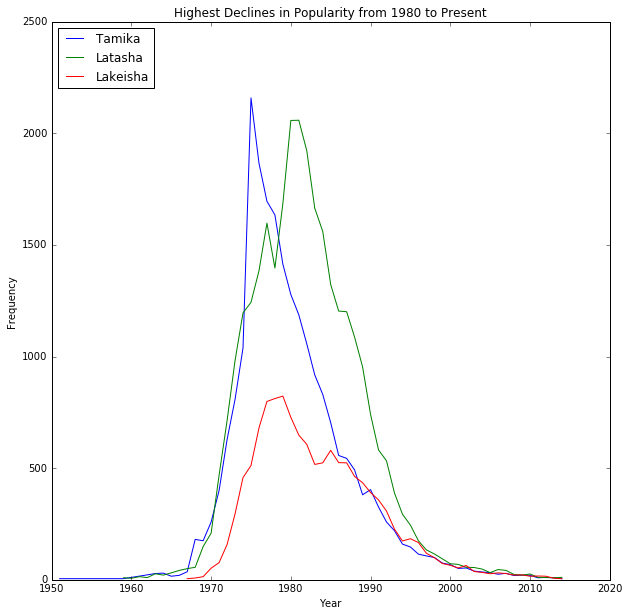

In [35]:
tamika = national_names[national_names['Name'] == 'Tamika']
tamika = tamika[tamika['Gender'] == 'F']

latasha = national_names[national_names['Name'] == 'Latasha']
latasha = latasha[latasha['Gender'] == 'F']

lakeisha = national_names[national_names['Name'] == 'Lakeisha']
lakeisha = lakeisha[lakeisha['Gender'] == 'F']

fig = plt.figure(figsize=(10, 10))
ax = plt.axes()

plt.plot(tamika['Year'],tamika['Count'], label='Tamika')
plt.plot(latasha['Year'],latasha['Count'], label = 'Latasha')
plt.plot(lakeisha['Year'],lakeisha['Count'], label='Lakeisha')

plt.title("Highest Declines in Popularity from 1980 to Present")
plt.xlabel("Year")
plt.ylabel("Frequency")
plt.legend(loc=2)

plt.savefig('1980_declines.png')

In [8]:
# build dictionary of years, values are counts for most popular name for each year
top_female_names_dict = {}
years_female = national_names.loc[national_names['Gender'] == 'F', 'Year'].values
counts_female = national_names.loc[national_names['Gender'] == 'F', 'Count'].values

for i in range(len(years_female)):
    if years_female[i] not in top_female_names_dict:
        top_female_names_dict[years_female[i]] = counts_female[i]
        
# build dictionary of years, values are counts for most popular name for each year
top_male_names_dict = {}
years_male = national_names.loc[national_names['Gender'] == 'M', 'Year'].values
counts_male = national_names.loc[national_names['Gender'] == 'M', 'Count'].values

for i in range(len(years_male)):
    if years_male[i] not in top_male_names_dict:
        top_male_names_dict[years_male[i]] = counts_male[i]
        
female_list = top_female_names_dict.items()
male_list = top_male_names_dict.items()

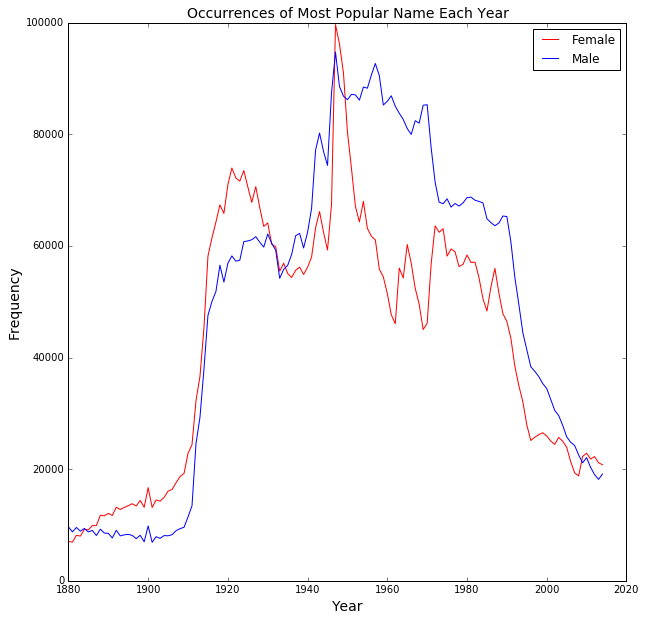

In [42]:
female_years = []
female_counts = []

for i in range(len(female_list)):
    female_years.append(female_list[i][0])
    female_counts.append(female_list[i][1])

male_years = []
male_counts = []

for i in range(len(male_list)):
    male_years.append(male_list[i][0])
    male_counts.append(male_list[i][1])

fig = plt.figure(figsize=(10, 10))
ax = plt.axes()

plt.plot(female_years, female_counts, label='Female', color = 'r')
plt.plot(male_years, male_counts, label='Male')

plt.title("Occurrences of Most Popular Name Each Year", size = '14')
plt.xlabel("Year", size = '14')
plt.ylabel("Frequency", size = '14')
plt.legend(loc='best')

plt.savefig('most_popular.png')